# MMEditing Tutorial - Super Resolution

Let's start!

## Install MMEditing

In [ ]:
# Install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# Install mmcv-full from source, this may take a while
!MMCV_WITH_OPS=1 pip install 'git+https://github.com/open-mmlab/mmcv.git'

# Install mmediting
!rm -rf mmediting
!git clone https://github.com/open-mmlab/mmediting.git
%cd mmediting
!pip install -e .

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4MB 26kB/s 
     |████████████████████████████████| 6.7MB 36.1MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.5.1+cu101 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
  Cloning https://github.com/open-mmlab/mmcv.git to /tmp/pip-req-build-wkxsn6iv
  Running command git clone -q https://github.com/open-mmlab/mmcv.git /tmp/pip-req-build-wkxsn6iv
     |████████████████████████████████| 194kB 31.0MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.5-cp37-cp37m-linux_x86_64.whl size=25691803 sha256=75b4a2bd589a6c3f5194dcec3bfa95802beaea66445b28ff7a33ce1021440b73
  Stored in directo

In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMEditing installation
import mmedit
print(mmedit.__version__)

1.5.1+cu101 True
0.7.0


## Perform inference with a MMEditing BasicVSR

MMEditing already provides high level APIs to do inference and training.

In [ ]:
!wget https://download.openmmlab.com/mmediting/restorers/basicvsr/basicvsr_reds4_20120409-0e599677.pth

--2021-05-28 11:56:47--  https://download.openmmlab.com/mmediting/restorers/basicvsr/basicvsr_reds4_20120409-0e599677.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25229171 (24M) [application/octet-stream]
Saving to: ‘basicvsr_reds4_20120409-0e599677.pth’

basicvsr_reds4_2012 100%[===================>]  24.06M  7.17MB/s    in 3.5s    

2021-05-28 11:56:51 (6.84 MB/s) - ‘basicvsr_reds4_20120409-0e599677.pth’ saved [25229171/25229171]



#### Change images file names

In [ ]:
%%bash
cd tests/data/vimeo90k/00001/0266/
rename -v 's/im//' *.png
rename -v 's/7/0/' *.png
cd ../../../../../
mkdir output

im1.png renamed as 1.png
im2.png renamed as 2.png
im3.png renamed as 3.png
im4.png renamed as 4.png
im5.png renamed as 5.png
im6.png renamed as 6.png
im7.png renamed as 7.png
7.png renamed as 0.png
0.png
1.png
2.png
3.png
4.png
5.png
6.png


# Run Inference on Test images

In [ ]:
!python demo/restoration_video_demo.py configs/restorers/basicvsr/basicvsr_reds4.py basicvsr_reds4_20120409-0e599677.pth tests/data/vimeo90k/00001/0266/ output/ --filename_tmpl '{:01d}.png'

2021-05-28 12:01:34,885 - mmedit - INFO - Use load_from_http loader
Downloading: "https://download.openmmlab.com/mmediting/restorers/basicvsr/spynet_20210409-c6c1bd09.pth" to /root/.cache/torch/checkpoints/spynet_20210409-c6c1bd09.pth
100% 5.50M/5.50M [00:01<00:00, 4.37MB/s]
Use load_from_local loader
The model and loaded state dict do not match exactly

missing keys in source state_dict: step_counter



# Results

In [ ]:
from google.colab.patches import cv2_imshow

Before
Height: 64, Width: 112


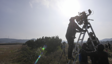

In [ ]:
# Input
import cv2
img = cv2.imread('tests/data/vimeo90k/00001/0266/1.png', cv2.IMREAD_UNCHANGED)
print("Before")
print(f"Height: {img.shape[0]}, Width: {img.shape[1]}")
cv2_imshow(img)

After
Height: 256, Width: 448


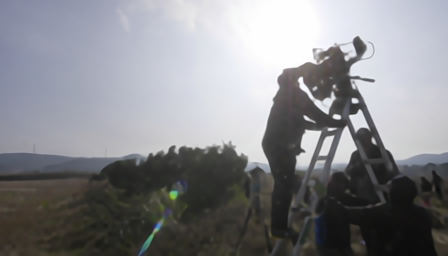

In [ ]:
# Output
import cv2
img = cv2.imread('output/00000001.png', cv2.IMREAD_UNCHANGED)
print("After")
print(f"Height: {img.shape[0]}, Width: {img.shape[1]}")
cv2_imshow(img)

Congratulations! You've done the tutorial of using MMEditing for matting task. Go to [Getting Started page](https://github.com/open-mmlab/mmediting/blob/master/docs/getting_started.md) for more usage of MMEditing and start to train your own mattor!

In [ ]:
# download output
from google.colab import files
files.download('output')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>